## <center> Exploring Portuguese Schools Data

## About Data
The provided data (portuguese_students.csv) includes the following variables/features:
- **school:** the school each student attends, Gabriel Periera ('GP') or Mousinho da Silveria ('MS')
- **address:** the location of the student’s home ('U' for urban and 'R' for rural)
- **absences:** the number of times the student was absent during the school year
- **Mjob:** the student’s mother’s job industry
- **Fjob:** the student’s father’s job industry
- **G3:** the student’s score on a math assessment, ranging from 0 to 20

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Introduction

##### Exercise 1
Load the data and inspect the first five rows of students using the ``.head()`` method. <br>
Take a look at the other columns. Which are categorical and which are quantitative?

In [2]:
students = pd.read_csv("portuguese_students.csv")
students.head()

,school,address,absences,Mjob,Fjob,G3
0,GP,U,6,at_home,teacher,6
1,GP,U,4,at_home,other,6
2,GP,U,10,at_home,other,10
3,GP,U,2,health,services,15
4,GP,U,4,other,other,10


##### Exercise 2
Suppose that we want to know whether there is an association between student math scores (G3) and the student’s address (urban or rural). <br>
- Separate out G3 scores into two separate lists: 
    - one for students who live in an urban location ('U') and one for students who live in a rural location ('R'). 
    - Name these lists `scores_urban` and `scores_rural`.

In [13]:
scores_urban = students[students["address"] == "U"]["G3"]
scores_rural = students[students["address"] == "R"]["G3"]

## Mean and Median Differences

##### Exercise 3
 Use `scores_urban` and `scores_rural` lists to calculate the mean score for both groups. <br>
 Store the results as `scores_urban_mean` and `scores_rural_mean`, respectively.

In [16]:
scores_urban_mean = scores_urban.mean()
scores_rural_mean = scores_rural.mean()

##### Exercise 4
Calculate the mean difference between the two groups and save the result as `mean_diff`.<br>
Based on this number, do you think the variables are associated? Why or why not?

In [36]:
mean_diff = abs(scores_rural_mean - scores_urban_mean)
mean_diff
print("""The difference between the means is very close to each other, there is only 1.16 point difference.
We can say that living in a rural or urban area has no effect on the score.""")

The difference between the means is very close to each other, there is only 1.16 point difference.
We can say that living in a rural or urban area has no effect on the score.


##### Exercise 5
Use the lists to calculate the median score for both groups. <br>
Store the results as `scores_urban_median`, `scores_rural_median`, respectively. Print out the result of each variable.

In [21]:
scores_urban_median = scores_urban.median()
scores_rural_median = scores_rural.median()
print(f"The score median of the urban area is {scores_urban_median}.")
print(f"The score median of the rural area is {scores_rural_median}.")

The score median of the urban area is 11.0.
The score median of the rural area is 10.0.


##### Exercise 6
Calculate the median difference between the two groups, save the result as `median_diff`. <br>
Based on this value, do you think the variables are associated? Why or why not?

In [35]:
median_diff = abs(scores_rural_median - scores_urban_median)
median_diff
print("""The difference between the medians is very close to each other, there is only 1 point difference.
We can say that living in a rural or urban area has no effect on the score.""")

The difference between the medians is very close to each other, there is only 1 point difference.
We can say that living in a rural or urban area has no effect on the score.


## Side-by-Side Box Plots

##### Exercise 7
Generate side-by-side boxplots for student scores (G3) by address.<br>
Is there any overlap between the boxes? Do you think the variables are associated?

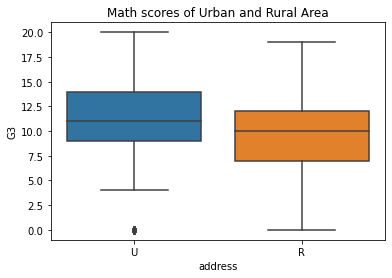

There is not much difference between the math scores of the two groups.


<Figure size 432x288 with 0 Axes>

In [40]:
sns.boxplot(data=students, x="address", y="G3")
plt.title("Math scores of Urban and Rural Area")
plt.show()
plt.clf()

print("There is not much difference between the math scores of the two groups.")

## Inspecting Overlapping Histograms

##### Exercise 8
 Use `scores_urban` and `scores_rural` to create an overlaid histogram of scores for students who live in urban and rural locations.

Remember to use different colors for each histogram, set ``normed = True``, ``alpha = 0.5``, and use the labels 'Urban' and 'Rural', respectively.

Based on the overlaid histogram, do you think there is an association between these two variables?

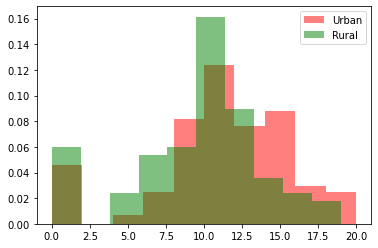

In [52]:
plt.hist(scores_urban, color= "red", label="Urban", density=True, alpha=0.5)
plt.hist(scores_rural, color= "green", label="Rural", density=True, alpha=0.5)

plt.legend()
plt.show()

# We can clearly see that the entire distribution of scores of Urban Area appears slightly shifted to the right.
# However, there is also still a lot of overlap between scores, suggesting that the association is relatively weak.

## Exploring Non-Binary Categorical Variables
Non-binary categorical variables have more than two categories.

##### Exercise 9
Create a side-by-side boxplot to assess whether there is an association between students’ math score (G3) and their fathers’ job (Fjob). <br>
Do you think there is an association between these variables? For which pairs of groups do you see differences?

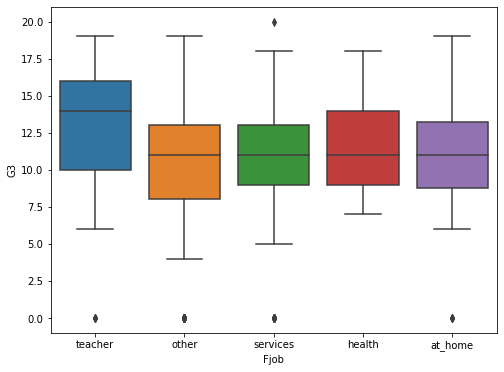

In [57]:
plt.figure(figsize=(8,6))
sns.boxplot(data=students, x="Fjob", y="G3")
plt.show()
# We can clearly see that Students whose fathers are teachers by profession have higher math point averages than others.

In [ ]:
#After calculating a mean or median difference and visually comparing distributions, 
#  the next step might be to run a hypothesis test to look for evidence of population-level differences 
#  (will a similar difference in scores be observed for ALL students who ever attend these schools?).